In [1]:
#matplotlib inline
import numpy as np
import pylab as plt
import sys
import os
import matplotlib.cm as cm

# Simple - make smartypy visible and importable
sys.path.append(os.path.split(os.getcwd())[0])
from smartypy import kmeans

## Kmeans Classify Some Test Data

In [29]:
X = kmeans._load_sample_data()
num_clusters = 3
centroids = kmeans.classify_kmeans(X,num_clusters)

K-means algo grouping dataset into 3 features, with maximum iterations 10

Classification iteration 4, %40.00 Finished with average cohesion 0.889
Centroid cohesion is no longer changing. Stopping classification

Classification finished with overall average cohesion 0.889


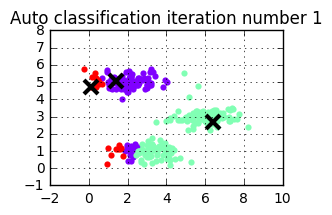

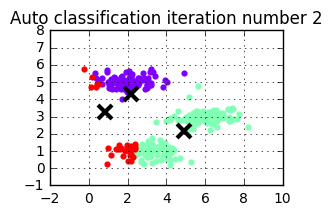

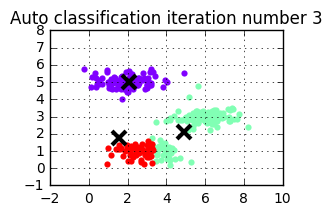

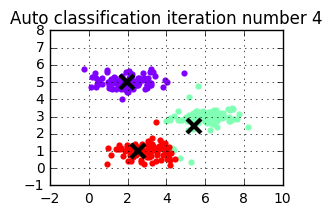

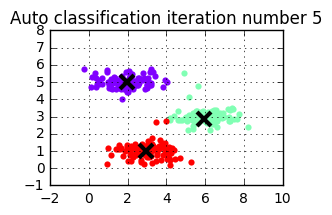

In [30]:
## Visualize! 
def plot_classifications(centroids,title="foo"):
    colors = cm.rainbow(np.linspace(0, 1, num_clusters))
    fig=plt.figure(figsize=(3,2))
    for ix,c in enumerate(centroids):
        plt.plot(c.x[0],c.x[1],marker='x',mec='k',ms=10,mew=3)
        xs = [a[0] for a in c.associated]
        ys = [a[1] for a in c.associated]
        plt.scatter(xs,ys,c=colors[ix],lw=0)
    plt.grid();plt.xlim([-2,10]);plt.ylim([-1,8]); plt.title(title);plt.show()
    return fig

    
## Draw the evolution. AKA plot in between each training

# The function calls below is exactly what is inside the wrapper `kmeans.classify_kmeans()`
max_iters = 5
centroids = kmeans.initialize_centroids(X,num_clusters)
for ii in range(max_iters):
    centroids = kmeans.associate_centroids(X,centroids)
    plot_classifications(centroids,title="Auto classification iteration number {}".format(ii+1))
    if ii < max_iters-1:
        kmeans.update_centroids(centroids)


# Image Compression with Kmeans! 


Compressing an image by grouping pixel image values into 18.format bins

K-means algo grouping dataset into 18 features, with maximum iterations 8

Classification iteration 2, %25.00 Finished with average cohesion 2.1e-07
Centroid cohesion is no longer changing. Stopping classification

Classification finished with overall average cohesion 0.000


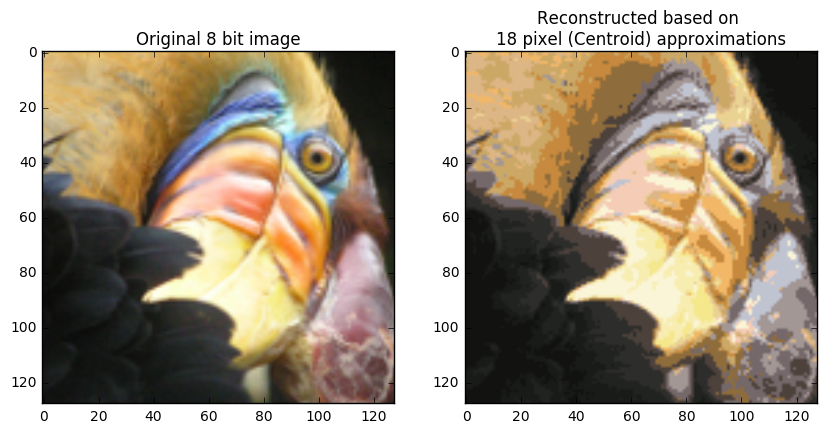

In [23]:
## Load up an image, transform into a useable dataset
im = plt.imread("../test/data/bird_small.png")
plt.figure(figsize=(10,30))
plt.subplot(1,2,1)
plt.imshow(im); plt.title("Original 8 bit image")

im /= 255 # Scale so everything is between 0-1
x,y,channels = im.shape

## Reshape to Nx3 where N is total number of pixels
X = np.reshape(im,(x*y,channels))
num_clusters = 18
max_iters = 8

# SLOOOOOOOW...
print("\nCompressing an image by grouping pixel image values into {} bins\n".format(num_clusters))
centroids =  kmeans.classify_kmeans(X,num_clusters,max_iters=max_iters)

## Reconstruct image
Xr = np.zeros_like(X)
for centroid in centroids:
    Xr[centroid.associated_ix] = centroid.x
im_recovered = np.reshape(Xr,(x,y,3))
plt.subplot(1,2,2)
plt.imshow(im_recovered*255); plt.title("Reconstructed based on \n{} pixel (Centroid) approximations".format(num_clusters));plt.show()

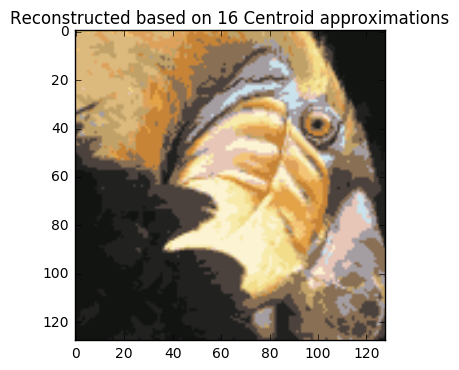